# Optimización Evolutiva

## Librerías necesarias.

In [22]:
!pip install pygad autograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from IPython.display import HTML
from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

## Rosenbrock 3d

In [382]:
def rosenbrock(X):
    result = 0
    for i in range(len(X)-1):
        result += 100*(X[i+1]-X[i]**2)**2+(X[i]-1)**2
    return result

def fit_func(gad_instance, solution, solution_idx):
    x = solution[0]
    y = solution[1]
    return 1.0 / (rosenbrock((x, y)) + 0.01)
pob=10
ga_instance_rosenbrock = pygad.GA(num_generations=200,
                       num_parents_mating=2,
                       fitness_func=fit_func,
                       sol_per_pop=pob,
                       num_genes=2,
                       init_range_low=-2,
                       init_range_high=2,
                       parent_selection_type="rank",
                       keep_parents=2,
                       crossover_type="uniform",
                       mutation_type="random",
                       mutation_percent_genes=65,
                       save_solutions=True)

ga_instance_rosenbrock.run()

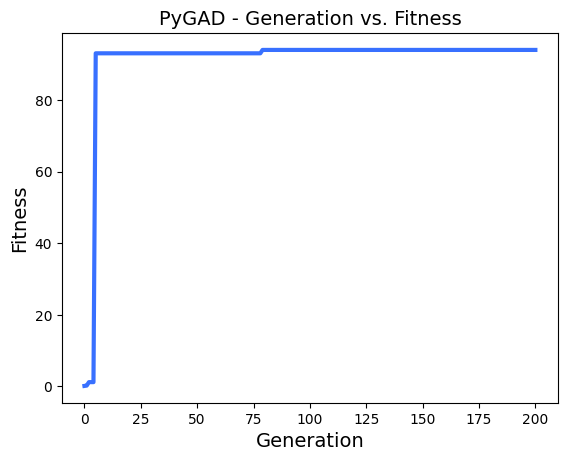

In [383]:
ga_instance_rosenbrock.plot_fitness()
plt.show()

In [384]:
soluciones_rosenbrock = ga_instance_rosenbrock.solutions
ga_instance_rosenbrock.best_solution()

(array([0.97736041, 0.95631613]), 94.07526126374114, 0)

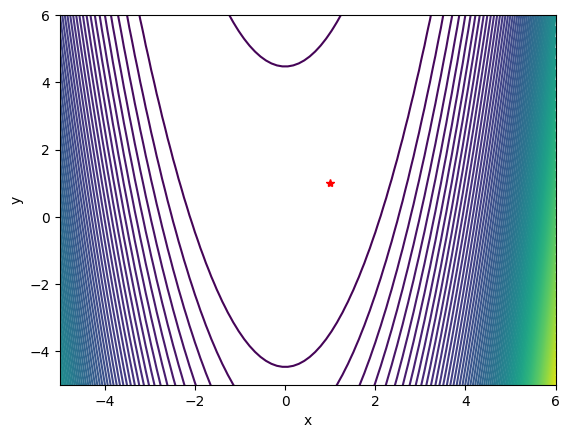

In [385]:
# Gráfia de la función Rosenbrock 
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig, ax = plt.subplots()

ax.set_xlim(( -5, 6))
ax.set_ylim((-5, 6))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 100)
ax.plot(1,1,"r*")
scatter, = ax.plot([], [], color='blue', linestyle="", marker='o', markersize=4)

# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_rosenbrock[i*pob:(i+1)*pob])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(soluciones_rosenbrock)/pob)-pob, interval=150, blit=True)

In [386]:
HTML(anim.to_html5_video())

In [387]:
anim.save("AE_ros3d.gif", dpi=120, writer="pillow")

## Rosenbrock 4d

In [390]:
def fit_func(gad_instance, solution, solution_idx):
    x = solution[0]
    y = solution[1]
    z = solution[2]
    return 1.0 / (rosenbrock((x, y, z)) + 0.01)
pob=20
ga_instance_rosenbrock = pygad.GA(num_generations=300,
                       num_parents_mating=5,
                       fitness_func=fit_func,
                       sol_per_pop=pob,
                       num_genes=3,
                       init_range_low=-1,
                       init_range_high=1,
                       parent_selection_type="rank",
                       keep_parents=2,
                       crossover_type="uniform",
                       mutation_type="random",
                       mutation_percent_genes=70,
                       save_solutions=True)

ga_instance_rosenbrock.run()

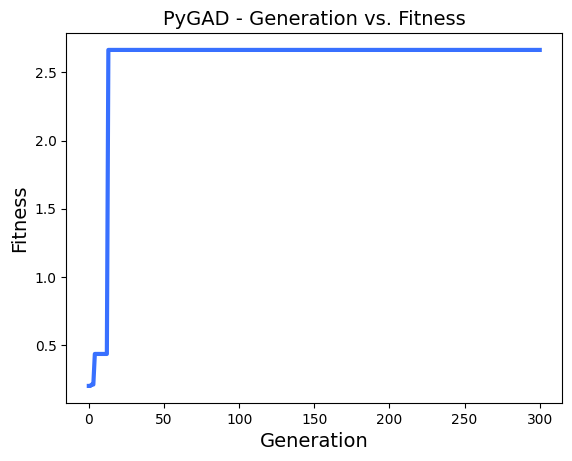

In [375]:
ga_instance_rosenbrock.plot_fitness()
plt.show()

In [376]:
soluciones_rosenbrock = ga_instance_rosenbrock.solutions
ga_instance_rosenbrock.best_solution()

(array([0.83053379, 0.73192871, 0.50622857]), 2.6655938040855127, 0)

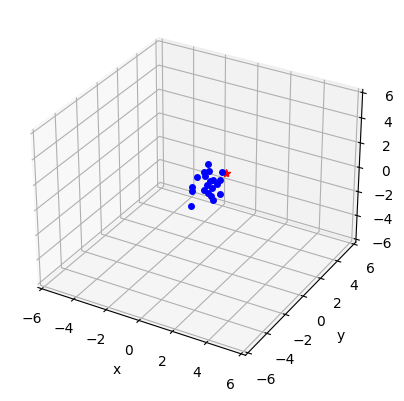

In [378]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_zlim((-6, 6))
ax.plot(1,1,1, "r*")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue', marker='o', markersize=4, linestyle='')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    Pob = np.array(soluciones_rosenbrock[i*pob:(i+1)*pob])
    plot.set_data(Pob[:,0],Pob[:,1])
    plot.set_3d_properties(Pob[:,2])
    return (plot,)
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(soluciones_rosenbrock)/pob)-pob, interval=50, blit=True)
HTML(anim.to_html5_video())

In [379]:
anim.save("AE_ros4d.gif", dpi=120, writer="pillow")

## Six Hump Camel 3d

In [401]:
def six_hump_camel(X):
    if len(X) == 3:
        x, y, z = X
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2+z**2
    else:
        x, y = X
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2

def fit_func(gad_instance, solution, solution_idx):
    return -six_hump_camel(solution)

pob = 10
ga_instance_camel = pygad.GA(num_generations=200,
                       num_parents_mating=2,
                       fitness_func=fit_func,
                       sol_per_pop=pob,
                       num_genes=2,
                       init_range_low=-1,
                       init_range_high=1,
                       parent_selection_type="rank",
                       keep_parents=2,
                       crossover_type="uniform",
                       mutation_type="random",
                       mutation_percent_genes=50,
                       save_solutions=True)

ga_instance_camel.run()

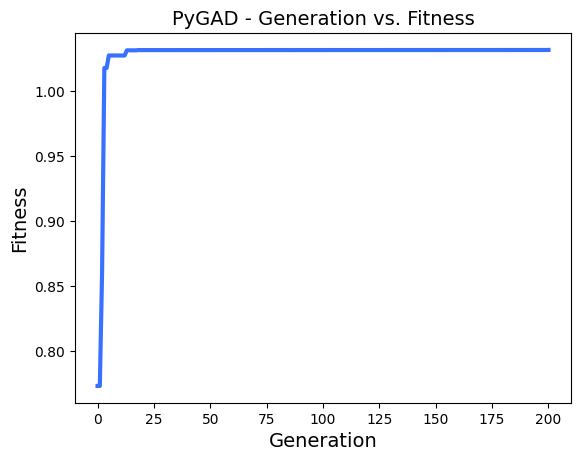

In [402]:
ga_instance_camel.plot_fitness()
plt.show()

In [403]:
soluciones_camel = ga_instance_camel.solutions
ga_instance_camel.best_solution()

(array([-0.08941802,  0.71020235]), 1.031579643750688, 0)

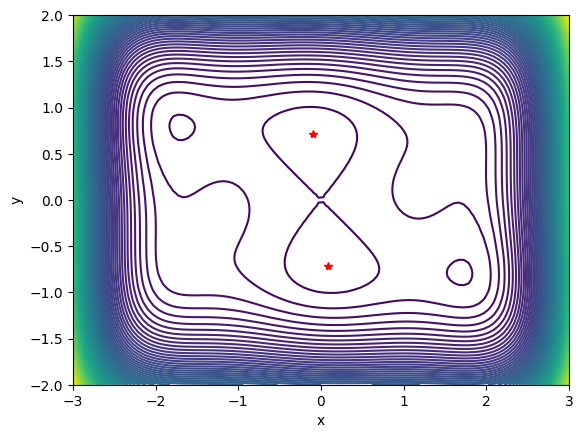

In [404]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = six_hump_camel((X, Y))

fig, ax = plt.subplots()

ax.set_xlim((-3, 3))
ax.set_ylim((-2, 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 100)
ax.plot(0.0898,-0.7126, "r*")
ax.plot(-0.0898,0.7126, "r*")
scatter, = ax.plot([], [], color='blue', linestyle="", marker='o', markersize=4)

# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_camel[i*pob:(i+1)*pob])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(soluciones_camel)/pob)-pob, interval=150, blit=True)

In [405]:
HTML(anim.to_html5_video())

In [406]:
anim.save("AE_camel3d.gif", dpi=120, writer="pillow")

## Six hump camel 4d

In [415]:
def fit_func(gad_instance, solution, solution_idx):
    return -six_hump_camel(solution)

pob = 10
ga_instance_camel = pygad.GA(num_generations=200,
                       num_parents_mating=2,
                       fitness_func=fit_func,
                       sol_per_pop=pob,
                       num_genes=3,
                       init_range_low=-1,
                       init_range_high=1,
                       parent_selection_type="rank",
                       keep_parents=2,
                       crossover_type="uniform",
                       mutation_type="random",
                       mutation_percent_genes=50,
                       save_solutions=True)

ga_instance_camel.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1083: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")


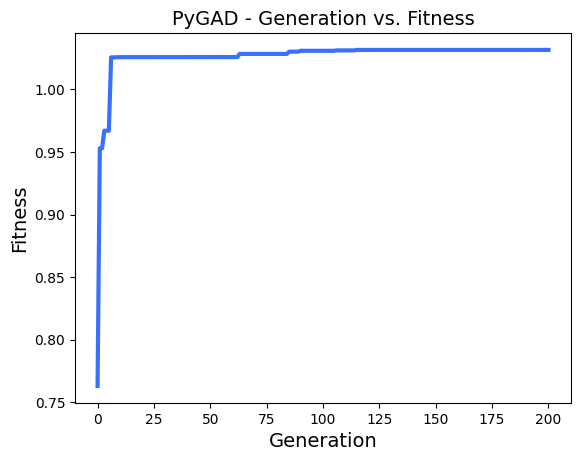

In [416]:
ga_instance_camel.plot_fitness()
plt.show()

In [417]:
soluciones_camel = ga_instance_camel.solutions
ga_instance_camel.best_solution()

(array([ 0.08773822, -0.71392835, -0.00288913]), 1.0315868962154133, 0)

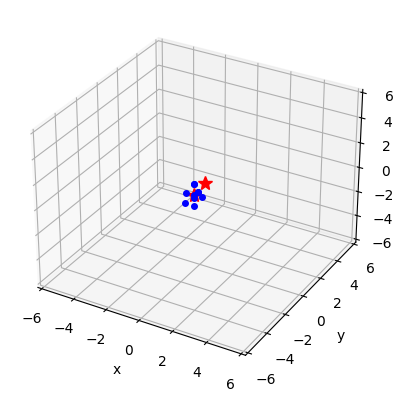

In [419]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_zlim((-6, 6))
ax.plot(0.0898,-0.7126, 0,color='red', marker='*', markersize=10, linestyle='')
ax.plot(-0.0898,0.7126, 0,color='red', marker='*', markersize=10, linestyle='')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue', marker='o', markersize=4, linestyle='')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    Pob = np.array(soluciones_camel[i*pob:(i+1)*pob])
    plot.set_data(Pob[:,0],Pob[:,1])
    plot.set_3d_properties(Pob[:,2])
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(soluciones_camel)/pob)-pob, interval=50, blit=True)
HTML(anim.to_html5_video())

In [420]:
anim.save("AE_camel4d.gif", dpi=120, writer="pillow")